# ETL

## Libraries

In [1]:
import numpy as np
import pandas as pd 
from tabulate import tabulate
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#pandas option to display max columns
pd.set_option('display.max_columns',None)
# Set Matplotlib defaults Style
plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
    )
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
import warnings
warnings.simplefilter("ignore")

## Importing and leaning Data 

In [2]:
df= pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv',index_col=False)
print(f'dataframe shape: {df.shape}')
df.head()


dataframe shape: (20000, 16)


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [3]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

In [4]:
df.isnull().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU',
       'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price',
       'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased',
       'Add-on Total'],
      dtype='object')

In [6]:
df["Payment Method"].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [7]:
df['Payment Method'] = df['Payment Method'].replace({'Paypal': 'PayPal'})

# EDA

## Descriptive Statsistics

In [8]:
# total numbers of unique clients
unique_customers = df['Customer ID'].nunique()

# total of orders
total_orders = df.shape[0]

# Calcule the number of customers who did more than one purshase
number_of_redundant_customers = total_orders - unique_customers
print (f'number of customers who made multiple orders :{number_of_redundant_customers} ')

number of customers who made multiple orders :7864 


In [9]:
# Basic descriptive statistics for numerical columns
numerical_stats = df.describe()
print(tabulate(numerical_stats, headers='keys', tablefmt='psql'))  # Tribute to Pascal coding

+-------+---------------+------------+-------------+---------------+--------------+-------------+----------------+
|       |   Customer ID |        Age |      Rating |   Total Price |   Unit Price |    Quantity |   Add-on Total |
|-------+---------------+------------+-------------+---------------+--------------+-------------+----------------|
| count |      20000    | 20000      | 20000       |      20000    |    20000     | 20000       |     20000      |
| mean  |      10483.5  |    48.9941 |     3.09395 |       3180.13 |      578.632 |     5.48555 |        62.2448 |
| std   |       5631.73 |    18.0387 |     1.22376 |       2544.98 |      312.274 |     2.87085 |        58.0584 |
| min   |       1000    |    18      |     1       |         20.75 |       20.75  |     1       |         0      |
| 25%   |       5478    |    33      |     2       |       1139.68 |      361.18  |     3       |         7.615  |
| 50%   |      10499.5  |    49      |     3       |       2534.49 |      463.96

In [10]:
# Get information on the non-numeric columns for a quick glance
non_numerical_info = df.describe(include=['object']).T
print(tabulate(non_numerical_info, headers = 'keys', tablefmt = 'psql'))# a little tribute to pascal coding

+-------------------+---------+----------+-------------------+--------+
|                   |   count |   unique | top               |   freq |
|-------------------+---------+----------+-------------------+--------|
| Gender            |   19999 |        2 | Male              |  10164 |
| Loyalty Member    |   20000 |        2 | No                |  15657 |
| Product Type      |   20000 |        5 | Smartphone        |   5978 |
| SKU               |   20000 |       10 | TBL345            |   2062 |
| Order Status      |   20000 |        2 | Completed         |  13432 |
| Payment Method    |   20000 |        5 | Credit Card       |   5868 |
| Purchase Date     |   20000 |      366 | 2024-04-26        |     88 |
| Shipping Type     |   20000 |        5 | Standard          |   6725 |
| Add-ons Purchased |   15132 |       75 | Extended Warranty |   1701 |
+-------------------+---------+----------+-------------------+--------+


## Visualizations 

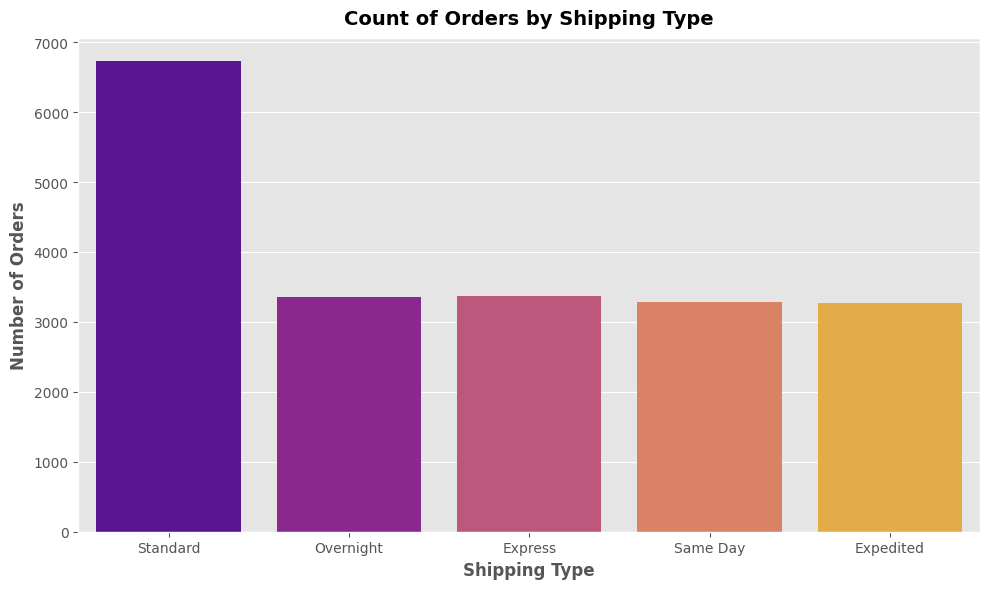

In [11]:
# 1. Count plot of orders by shipping type
# This plot shows the number of orders by different shipping methods (Standard, Express, etc.)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Shipping Type', palette='plasma')
plt.title('Count of Orders by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Orders')
plt.show()

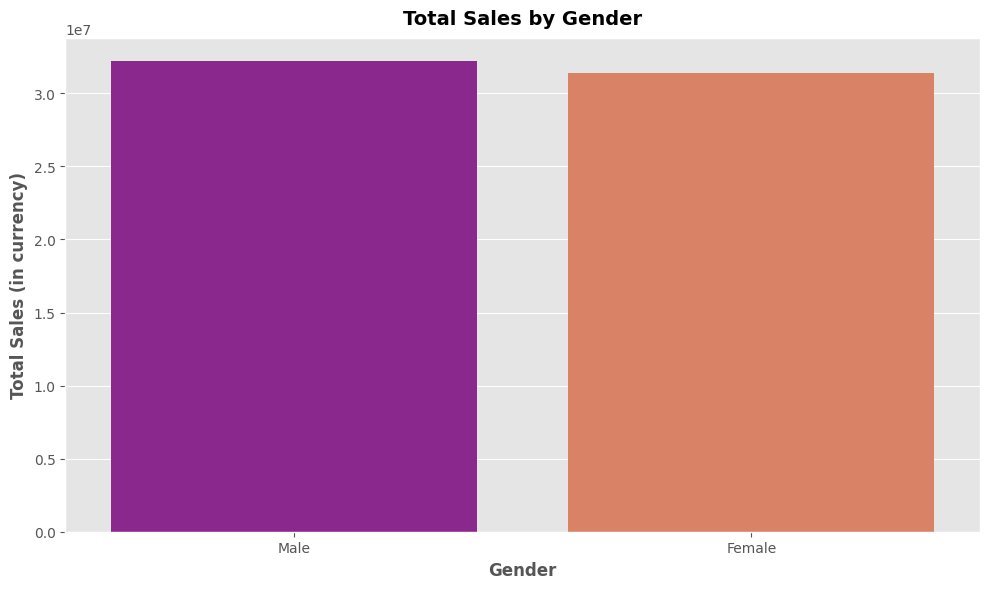

In [12]:
# 2. Bar plot of total sales by gender
# This bar plot shows the total sales made by male and female customers.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Total Price', estimator=sum, ci=None, palette='plasma')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (in currency)')
plt.show()

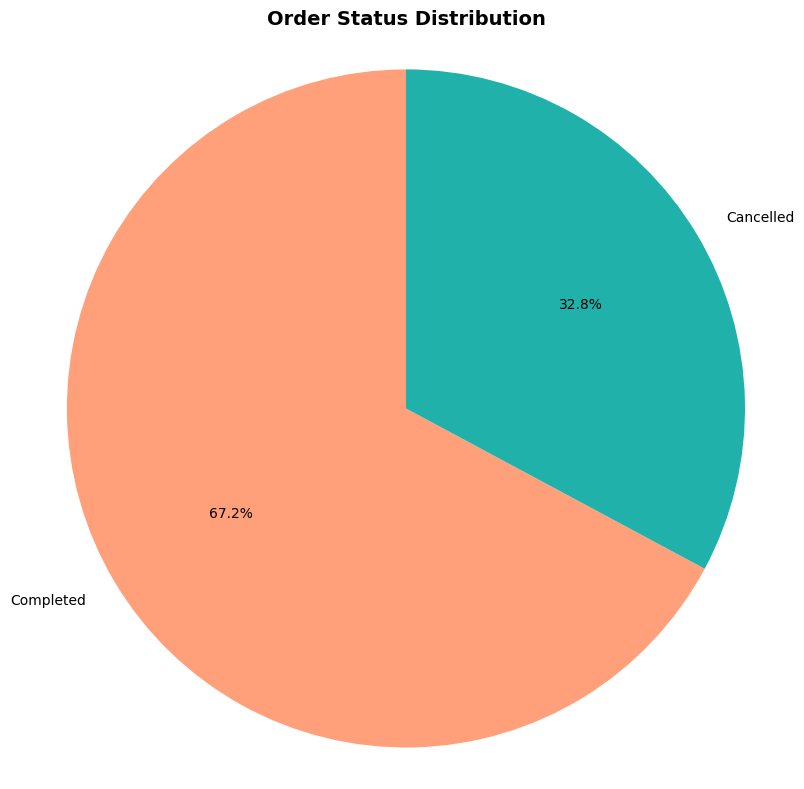

In [13]:
# 3. Pie chart of order status (using Matplotlib)
# This pie chart visualizes the proportion of completed and canceled orders.
order_status_counts = df['Order Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFA07A', '#20B2AA'])
plt.title('Order Status Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

In [14]:
# 4. Sales distribution by product type
# This graph shows how sales are distributed across different product categories.
fig_product_sales = px.histogram(df, x='Product Type', title="Sales Distribution by Product Type", 
                                 color='Product Type', labels={'Product Type': 'Product Type'},
                                 template='plotly', height=400)
fig_product_sales.show()

In [15]:
# 5. Distribution of payment methods used
# This pie chart displays which payment methods customers prefer.
fig_payment_method = px.pie(df, names='Payment Method', title="Payment Methods Distribution",
                            hole=0.3, template='plotly')
fig_payment_method.show()

In [16]:
# 6. Distribution of product ratings by category
# This box plot allows us to analyze the distribution of customer ratings for each product category.
fig_ratings = px.box(df, x='Product Type', y='Rating', color='Product Type', 
                     title="Product Ratings by Category", template='plotly')
fig_ratings.show()

In [17]:
# Scatter plot showing relationship between Quantity and Total Price for each Product Type
fig_quantity_vs_price = px.scatter(df, x='Quantity', y='Total Price', color='Product Type',
                                   title="Quantity vs Total Price by Product Type",
                                   labels={'Quantity': 'Number of Units', 'Total Price': 'Total Price'},
                                   template='plotly', hover_data=['Product Type'],
                                   size='Total Price', size_max=20)
fig_quantity_vs_price.show()

In [18]:
# 7. Sales trend over time
# This line chart tracks sales trends over time (monthly aggregation).
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  # Convert date column to datetime
df['Month'] = df['Purchase Date'].dt.to_period('M')  # Extract month for grouping

# Group by month and calculate total sales per month
monthly_sales = df.groupby('Month')['Total Price'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # Convert Month to string for plotting

fig_sales_trend = px.line(monthly_sales, x='Month', y='Total Price', title="Monthly Sales Trend",
                          labels={'Month': 'Month', 'Total Price': 'Total Sales'},
                          template='plotly', height=400)
fig_sales_trend.show()

# Clustering

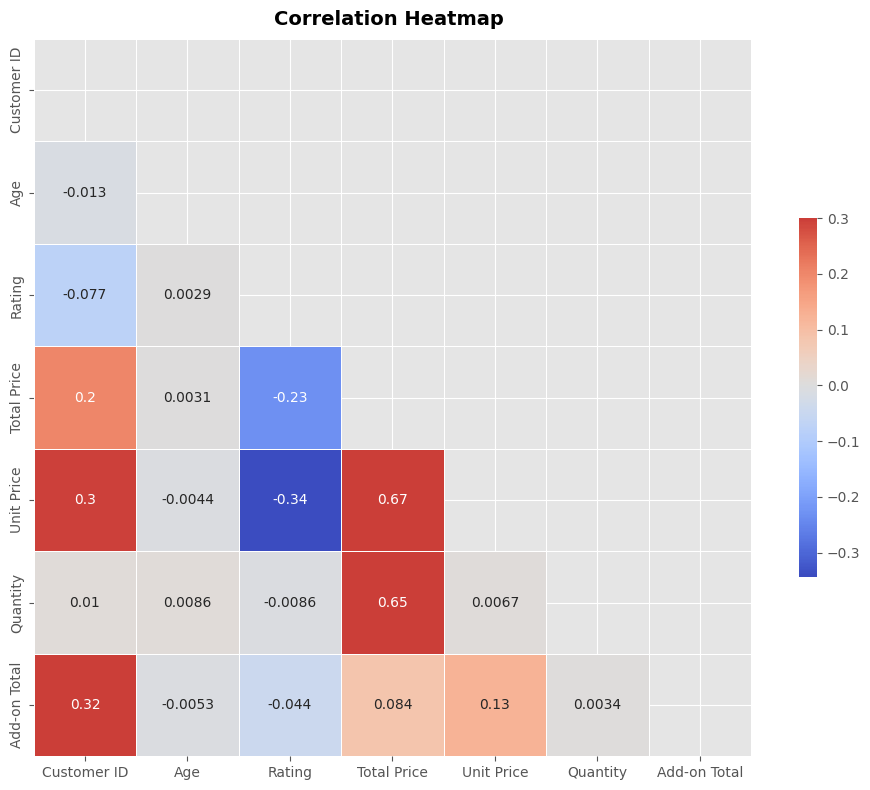

In [19]:
# Compute the correlation matrix
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = corr = numeric_df.corr()
# Generate a mask for the upper triangle (optional, for cleaner visualization)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap ')
plt.show()

## Elbow Method For Optimal numbers of clusters

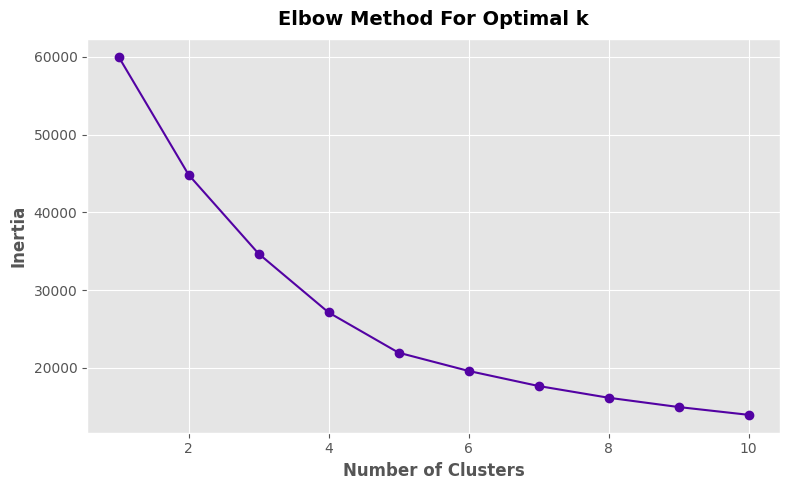

In [20]:
# Select relevant features for segmentation
features = df[['Age', 'Quantity', 'Add-on Total']]

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Clustering visualization 3D

In [21]:
# KMeans with the optimal number of clusters (4 as seen in Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters using Age and Total Price
# 3D Scatter plot with Age, Total Price, and Quantity, colored by Cluster
fig = px.scatter_3d(df, x='Age', y='Total Price', z='Quantity', color='Cluster',
                    title='Customer Segmentation in 3D: Age, Total Spending, Quantity',
                    labels={'Cluster': 'Customer Segment'},
                    template='plotly')
fig.show()

In [22]:
# Analyze cluster characteristics
    # Convert 'Add-on Total' to numeric, forcing errors to NaN if necessary
df['Add-on Total'] = pd.to_numeric(df['Add-on Total'], errors='coerce')

   # Ensure that all columns are numeric
   # Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

   # Group by 'Cluster' and calculate the mean for numeric columns only
cluster_summary = numeric_df.groupby('Cluster').mean()

# Display the summary of cluster characteristics
print(cluster_summary)

          Customer ID        Age    Rating  Total Price  Unit Price  Quantity  \
Cluster                                                                         
0         9475.828202  68.079279  3.125060  3118.454257  555.277149  5.600734   
1        14826.999697  50.533939  2.970606  3720.127755  673.181779  5.553939   
2         9700.064133  36.582937  3.098773  4632.324656  564.205764  8.204276   
3         9729.083659  37.463097  3.128834  1556.823365  561.393846  2.755903   

         Add-on Total  
Cluster                
0           39.700439  
1          162.626009  
2           43.592708  
3           44.454122  


**IF LIKE THE WORK PLEASE LEAVE A COMMENT AND UPVOTE**